In [3]:
#  main execution point 

Data loaded successfully.
Removed 0 duplicate rows.


<string>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perfor

Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AircraftType              25429 non-null  object        
 1   AirportName               25429 non-null  object        
 2   AltitudeBin               25429 non-null  object        
 3   MakeModel                 25429 non-null  object        
 4   NumberStruck              25429 non-null  object        
 5   NumberStruckActual        25429 non-null  int64         
 6   FlightDate                25429 non-null  datetime64[ns]
 7   Damage                    25429 non-null  object        
 8   Engines                   25429 non-null  object        
 9   Operator                  25429 non-null  object        
 10  OriginState               25429 non-null  object        
 11  FlightPhase               25429 non-null  object     

<string>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perfor

Data cleaned successfully!
Basic Statistics:
       NumberStruckActual                     FlightDate      Altitude  \
count        25429.000000                          25429  25429.000000   
mean             2.699634  2007-01-22 13:20:40.017303040    799.028432   
min              1.000000            2000-01-02 00:00:00      0.000000   
25%              1.000000            2004-06-17 00:00:00      0.000000   
50%              1.000000            2007-07-29 00:00:00     50.000000   
75%              1.000000            2009-11-01 00:00:00    700.000000   
max            942.000000            2011-12-31 00:00:00  18000.000000   
std             12.825804                            NaN   1740.079843   

       PeopleInjured  
count   25429.000000  
mean        0.000826  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         6.000000  
std         0.047339  


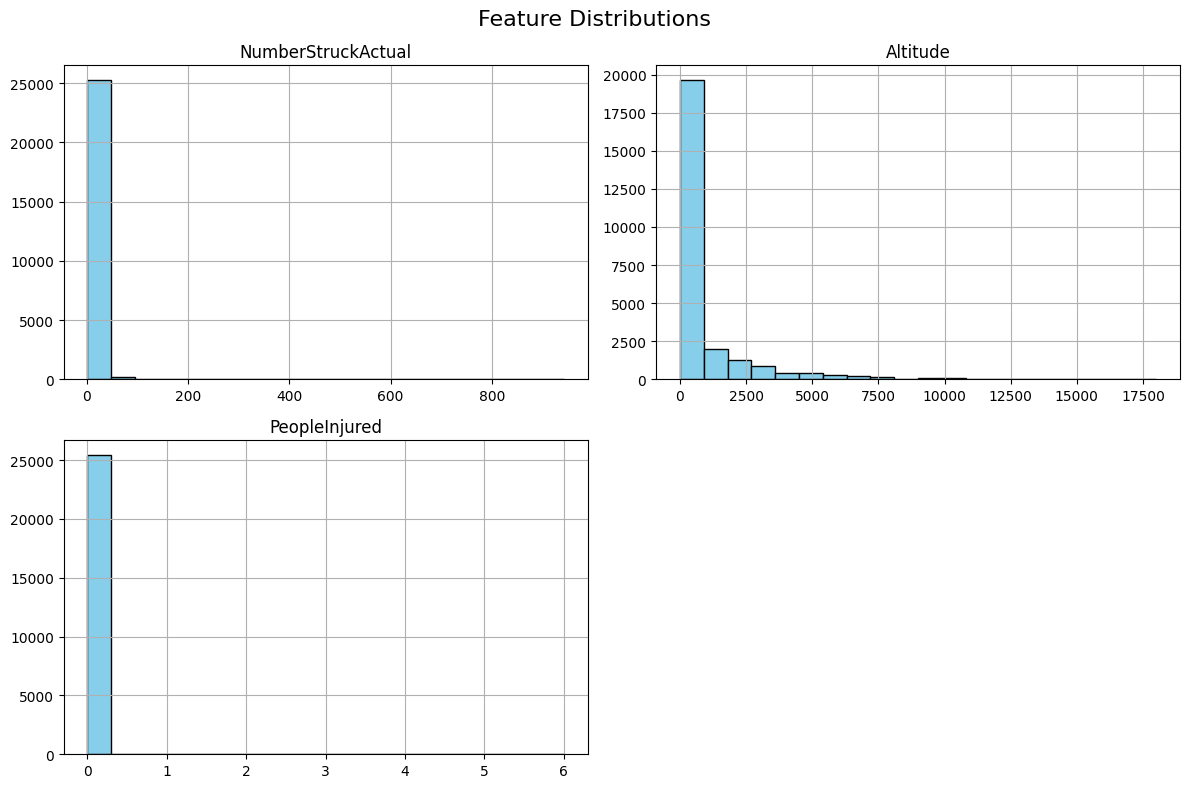

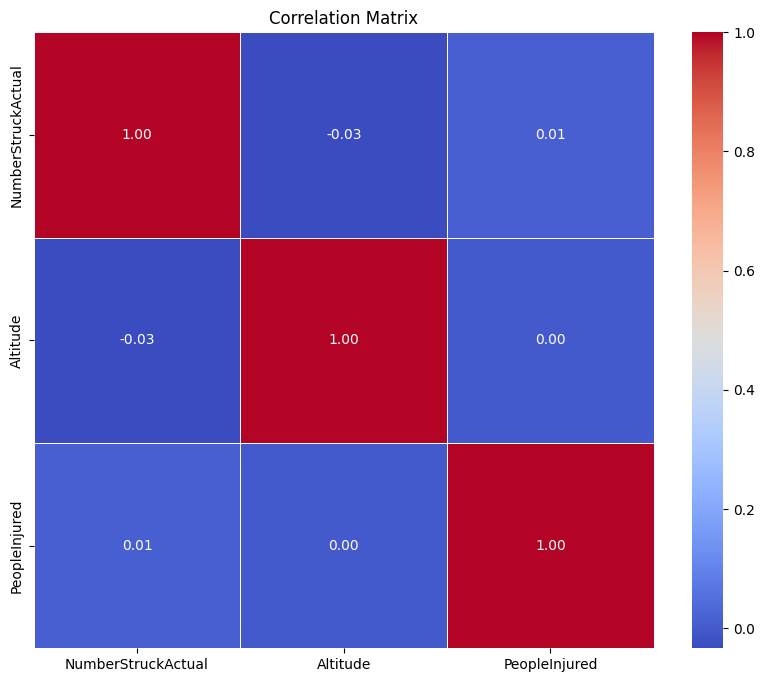

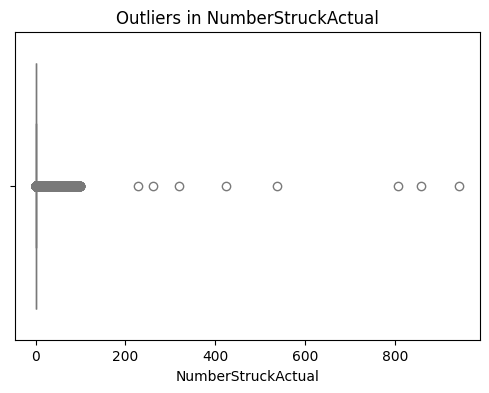

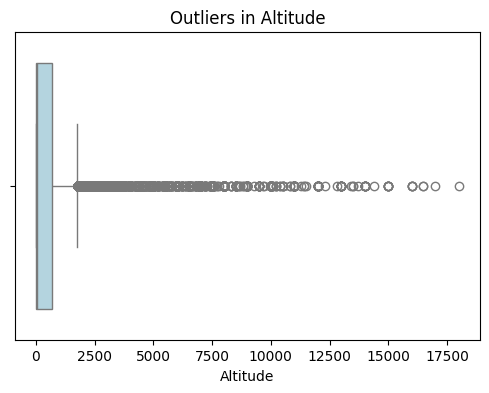

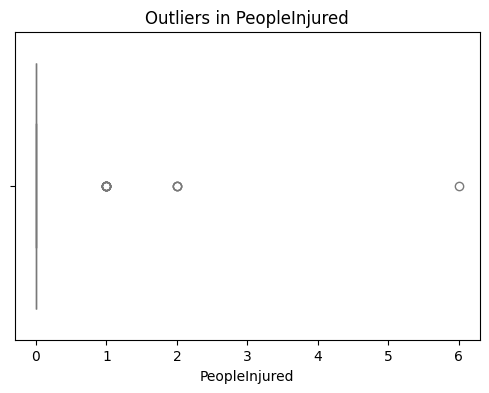

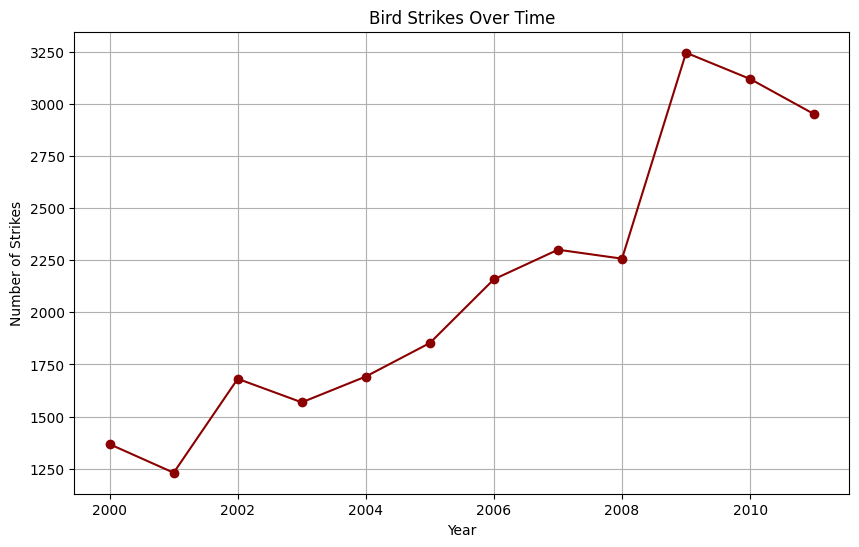

In [4]:
import import_ipynb
import importlib
import sys
import os

# Add the notebook's directory to sys.path
notebook_path = os.path.dirname(os.getcwd())  # Go one level up to access other files
sys.path.append(notebook_path)

# Import modules
from BirdStrikeDataCleaner import BirdStrikeDataCleaner
from BirdStrikeEDA import BirdStrikeEDA

# Import BirdStrikeAnalysis using importlib
BirdStrikeAnalysis = importlib.import_module("BirdStrikeAnalysis")

# File path (adjust based on your folder structure)
file_path = '../data/Bird_strikes.csv'

# Initialize and clean data
cleaner = BirdStrikeDataCleaner(file_path)
cleaned_data = cleaner.clean_data()

# Initialize analysis class
analysis = BirdStrikeAnalysis.BirdStrikeAnalysis(cleaned_data)

# Perform analysis
analysis.show_basic_stats()
analysis.plot_distributions()
analysis.plot_correlation_matrix()
analysis.detect_outliers()
analysis.plot_trend()


In [5]:
#  model preprocessing 
# Import Preprocessor
from ModelPreprocessor import BirdStrikeModelPreprocessing

# Initialize preprocessing
preprocessor = BirdStrikeModelPreprocessing(cleaned_data)

# Encode categorical and datetime features
preprocessor.encode_categorical()

# Split data
X_train, X_test, y_train, y_test = preprocessor.split_data()

# Scale features
X_train_scaled, X_test_scaled = preprocessor.scale_features(X_train, X_test)

# Confirm success
print("✅ Preprocessing complete.")




✅ Categorical and datetime features processed.
✅ Data split into train and test sets.
✅ Features scaled.
✅ Preprocessing complete.


In [6]:
# Import and initialize the model builder
import sys
import importlib
sys.path.append('./notebooks')
from ModelBuilder import BirdStrikeModelBuilder
importlib.reload(sys.modules['ModelBuilder'])

# Initialize model builder
model_builder = BirdStrikeModelBuilder(X_train, X_test, y_train, y_test)

# Train model
model_builder.train_model()

# Evaluate model
accuracy, confusion, report = model_builder.evaluate_model()


Training model...
Model training completed.
Evaluating model...
Accuracy: 93.04%
Confusion Matrix:
[[  84  136]
 [  41 2282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.38      0.49       220
           1       0.94      0.98      0.96      2323

    accuracy                           0.93      2543
   macro avg       0.81      0.68      0.72      2543
weighted avg       0.92      0.93      0.92      2543



In [25]:
# Plot feature importance
# model_builder.plot_feature_importance()